In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
import pyscreenshot  as ImageGrab
from selenium.webdriver.common.action_chains import ActionChains

chromeOptions = Options()
chromeOptions.add_argument("--kiosk")
browser = webdriver.Chrome()
browser.get('https://devspotfire.ual.com/spotfire/wp/OpenAnalysis?file=/Marketing%2051/Goel%2CAnmol%20U346483/INTERNAL%20CSD/Day_level_CSD%20Dashboard_v1.11_20170418_v2_INFORMATION%20LINK')
element = browser.find_element_by_name("username")
element.send_keys("u346442")
element2 = browser.find_element_by_name("password")
element2.send_keys("micey24121962")
browser.find_element_by_xpath("//*[@class='LoginButton']").click()
time.sleep(60)
html = browser.find_element_by_tag_name("html")
#html.send_keys(Keys.CONTROL, Keys.ADD)
time.sleep(10)
im=ImageGrab.grab()
im.show()

In [1]:
import numpy as np 
import pandas as pd
import math 
import operator
import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt                                # plotting
from scipy.stats import multivariate_normal                    # multivariate Gaussian distribution
import copy                                                    # deep copies

In [2]:
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = [
    ]
    for i in range(num_data):
        k = np.random.choice(len(weights), 1, p=weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data.append(x)
    return data


init_means = [
    [5, 0], # mean of cluster 1
]
init_covariances = [
    [[.5, .9], [0, .1]], # covariance of cluster 1
]
init_weights = [1]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(100, init_means, init_covariances, init_weights)
data=np.matrix(data)

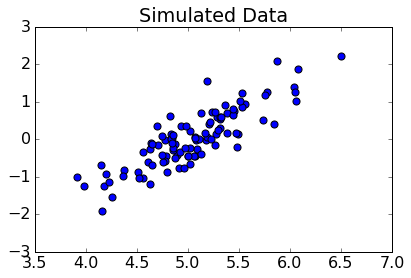

In [3]:
plt.figure()
d = np.vstack(data)
plt.scatter(d[:,0], d[:,1],s=50)
plt.rcParams.update({'font.size':16})
plt.tight_layout()
plt.title('Simulated Data')
plt.show()

In [4]:
X=np.hstack((np.matrix(np.ones([len(data),1])), data[:, 0]))
Y=data[:, 1]

In [5]:
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [6]:
betaHat

matrix([[-6.92011834],
        [ 1.37787403]])

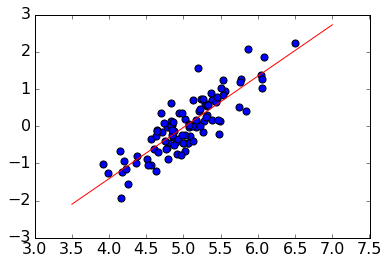

In [7]:
xx = np.linspace(3.5, 7, 2)
yy = np.array(betaHat[0] + betaHat[1] * xx)
plt.plot(xx, yy.T, color='r')
plt.scatter(d[:,0], Y,s=50)
plt.show()

In [17]:
beta2=np.matrix([0,0]).T
J=np.zeros(45000)
for x in range(0, 45000):
    J[x]=(1/2*100)*((beta2.T.dot(X.T).T-Y).T.dot(beta2.T.dot(X.T).T-Y))
    beta2=beta2-(0.01)*(1/100)*((np.multiply(((beta2.T.dot(X.T)).T-Y),X)).sum(axis=0).T)

In [18]:
beta2

matrix([[-6.78032615],
        [ 1.35040971]])

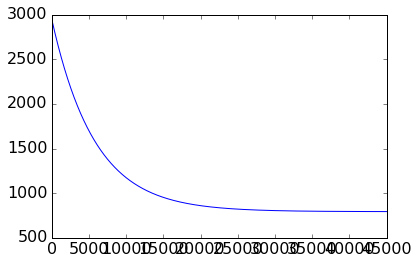

In [19]:
plt.plot(J)

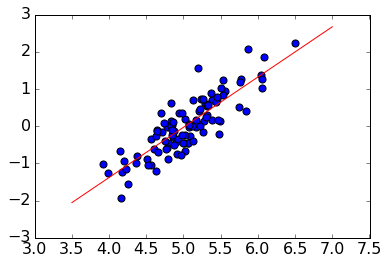

In [20]:
xx1 = np.linspace(3.5, 7, 2)
yy1 = np.array(beta2[0] + beta2[1] * xx1)
plt.plot(xx1, yy1.T, color='r')
plt.scatter(d[:,0], d[:,1],s=50)
plt.show()